In [1]:
import numpy as np
from scipy.stats import norm, skewnorm
# Function to generate data with a Gaussian and skewed distribution
def generate_data(mu=0, sigma=1, skw=5, n=10000):
    # Generate Gaussian data
    gaussian_data = np.random.normal(mu, sigma, n)

    # Introduce some non-Gaussianity - skewness (shape parameter)
    # For the skew-normal distribution, the shape parameter determines the degree and direction of skewness. 
    # When it is positive, it indicates right-skewed (positively skewed) data, and when negative, 
    # it represents left-skewed (negatively skewed) data. The larger the absolute value, 
    # the more pronounced the skewness.
    skewed_data = skewnorm.rvs(skw, loc=mu, scale=sigma, size=n)

    # Combine Gaussian and skewed data
    return np.concatenate((gaussian_data, skewed_data))

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Use scipy to simulate 2 difference chains for 2 parameter
# First chain (experiment 1)
A1 = generate_data(mu=0.2, sigma=1.3, skw=8, n=10000)
B1 = generate_data(mu=12.3, sigma=2.5, skw=-4, n=10000)
C1 = generate_data(mu=6.7, sigma=1.4, skw=-7, n=10000)
D1 = generate_data(mu=3.4, sigma=1.0, skw=28, n=10000)
E1 = generate_data(mu=1.2, sigma=1.8, skw=5, n=10000)
F1 = generate_data(mu=-0.8, sigma=1.2, skw=3, n=10000)

# Second chain (experiment 2)
A2 = generate_data(mu=0.1, sigma=1.4, skw=3, n=10000)
B2 = generate_data(mu=11.9, sigma=2.6, skw=5, n=10000)
C2 = generate_data(mu=4.8, sigma=1.0, skw=10, n=10000)
D2 = generate_data(mu=2.9, sigma=1.2, skw=-19, n=10000)
E2 = generate_data(mu=1.4, sigma=1.9, skw=4, n=10000)
F2 = generate_data(mu=-0.9, sigma=1.3, skw=3, n=10000)

# Use GetDist to plot the 2D posterior
from getdist import plots, MCSamples
chain1 = MCSamples(samples=[A1, B1, C1, D1, E1, F1], 
                        names=['A', 'B', 'C', 'ln{10A_s}', 'E', 'F'],
                        labels=['A', 'B', 'C', 'ln{10A_s}', 'E', 'F'], 
                        label='Exp 1',
                        settings={'ignore_rows':0.})
chain2 = MCSamples(samples=[A2, B2, C2, D2, E2, F2],
                        names=['A', 'B', 'C', 'ln{10A_s}', 'E', 'F'],
                        labels=['A', 'B', 'C', 'ln{10A_s}', 'E', 'F'], 
                        label='Exp 2',
                        settings={'ignore_rows':0.})

Removed no burn in
Removed no burn in


In [3]:
from python_scripts.flow import *
# Create a DiffFlow object
flow = DiffFlow(chain1, chain2, params=chain1.getParamNames().list())

2024-01-09 20:14:16.428056: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 20:14:17.026923: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 20:14:17.027025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 20:14:17.144467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 20:14:17.403652: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 20:14:17.406584: I tensorflow/core/platform/cpu_feature_guard.cc:1

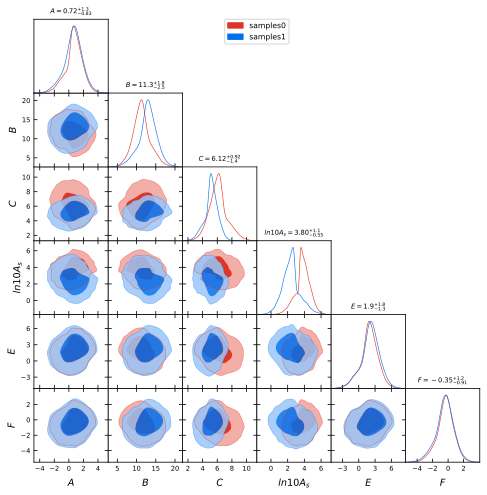

In [4]:
# By default, the object builds new chains using only the selected parameters
flow.plot_chains()

In [4]:
# Build the difference chains
flow.build_diff()
# Plot the difference chains
flow.plot_diff()

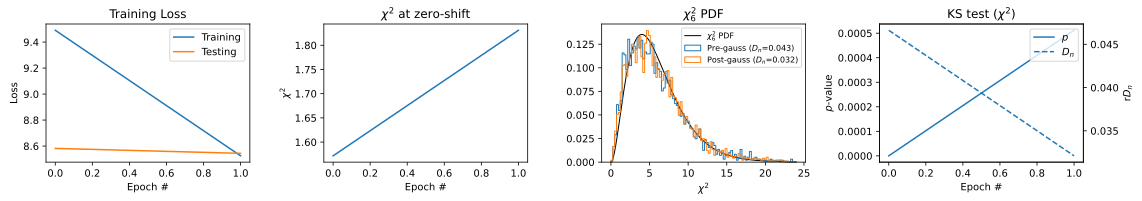

128/128 [==============================] - 5s 37ms/step - loss: 8.5251 - val_loss: 8.5442 - shift0_chi2: 1.8309 - shift0_pval: 0.0654 - shift0_nsigma: 0.0821 - chi2Z_ks: 0.0321 - chi2Z_ks_p: 5.1186e-04 - lr: 0.0100
Training completed.
Time taken to train the model: 27.212085008621216 seconds


In [5]:
# Train the Normalizing Flow model
# Print the time taken to train the model
import time
start = time.time()
flow.train(eta=0.01, epochs=2, batch_size=256, steps_per_epoch=128)
end = time.time()
print('Time taken to train the model: {} seconds'.format(end-start))

In [6]:
# Check whether the model is trained or not
flow.is_trained

True

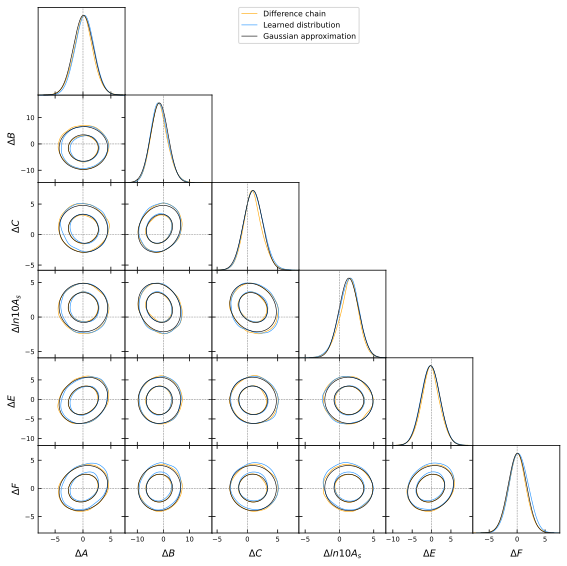

In [7]:
# Plot the learned and the approximated distributions, as well as the difference chain
flow.plot_distributions()

In [8]:
# Estimate the shift probability on multiple runs to avoid random oscillations
flow.estimate_shift()

Considering ['delta_A', 'delta_B', 'delta_C', 'delta_ln{10A_s}', 'delta_E', 'delta_F'] parameters...
Shift probability = 0.14683 + 0.00360 - 0.00353
    n_sigma = 0.185
